In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np


# 创建模型序列VGG13
model = Sequential()  
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(20,activation='softmax'))  
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

checkpoint = ModelCheckpoint('VGG13.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [3]:
# 载入数据
path = './Standard/RGB224'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 224, 224, 3)


In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
    zoom_range = 0.2, # Range for random zoom 
    horizontal_flip = True, # Randomly flip inputs horizontally
    width_shift_range = 0.15, # Range for horizontal shift 
    height_shift_range = 0.15, # Range for vertical shift 
    shear_range = 0.2) # Shear Intensity
datagen.fit(X_train)


#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])


history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])

Epoch 1/100
200/200 [==============================] - 37s 186ms/step - loss: 2.8416 - accuracy: 0.1225 - val_loss: 2.8689 - val_accuracy: 0.0889

Epoch 00001: val_accuracy improved from -inf to 0.08886, saving model to VGG13.hdf5
Epoch 2/100
200/200 [==============================] - 32s 161ms/step - loss: 2.8286 - accuracy: 0.1124 - val_loss: 2.7006 - val_accuracy: 0.1752

Epoch 00002: val_accuracy improved from 0.08886 to 0.17522, saving model to VGG13.hdf5
Epoch 3/100
200/200 [==============================] - 33s 164ms/step - loss: 2.8523 - accuracy: 0.1005 - val_loss: 2.8042 - val_accuracy: 0.1414

Epoch 00003: val_accuracy did not improve from 0.17522
Epoch 4/100
200/200 [==============================] - 32s 158ms/step - loss: 2.7316 - accuracy: 0.1604 - val_loss: 2.5423 - val_accuracy: 0.2140

Epoch 00004: val_accuracy improved from 0.17522 to 0.21402, saving model to VGG13.hdf5
Epoch 5/100
200/200 [==============================] - 33s 163ms/step - loss: 2.5510 - accuracy: 0.

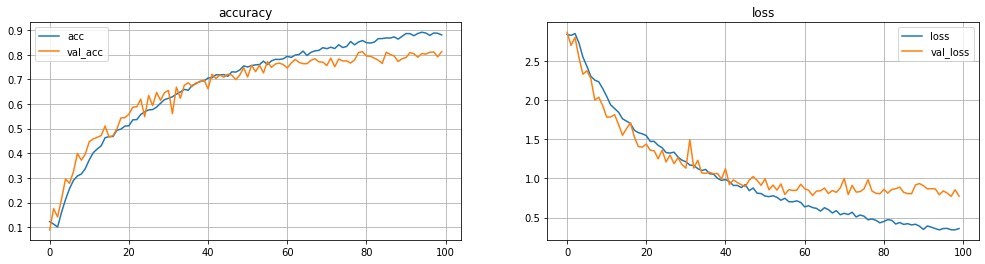

In [5]:
import matplotlib.pyplot as plt
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')
plt.savefig("./Image/VGG13_sgd_epoch100_beach_size16_gendata.png")

In [ ]:
# 保存模型
model.save("./Model/VGG13_sgd_epoch100_beach_size16_gendata")

In [ ]:
# 保存模型
model.save("./Model/VGG13_sgd_epoch100_beach_size16_gendata")